In [3]:
import sys
!{sys.executable} -m pip install keras

     |████████████████████████████████| 25.9 MB 9.6 MB/s eta 0:00:01     |██████████████████████▋         | 18.3 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 640 kB 44.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [16]:
# Verify GPU is detected
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14530144665183423315
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6994992832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14274582557618396185
physical_device_desc: "device: 0, name: GeForce RTX 3070, pci bus id: 0000:2d:00.0, compute capability: 8.6"
]
2.4.1
Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5838 - accuracy: 0.7186 - val_loss: 0.4089 - val_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3509 - accuracy: 0.8997 - val_loss: 0.3370 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2687 - accuracy: 0.9211 - val_loss: 0.3209 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2187 - accuracy: 0.9365 - val_loss: 0.2833 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1834 - accuracy: 0.9440 - val_loss: 0.2852 - val_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1623 - accuracy: 0.9521 - val_loss: 0.2731 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1402 - accuracy: 0.9589 - val_loss: 0.2786 - val_accuracy: 0.8884
Epoch 8/20
30

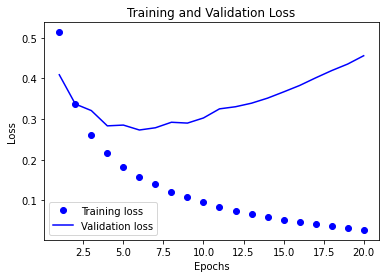

In [27]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

validation_size = 10_000

x_validate = x_train[:validation_size]
x_train_partial = x_train[validation_size:]

y_validate = y_train[:validation_size]
y_train_partial = y_train[validation_size:]

history = model.fit(
    x_train_partial, 
    y_train_partial, 
    epochs=20, 
    batch_size=512,
    validation_data=(x_validate, y_validate))

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

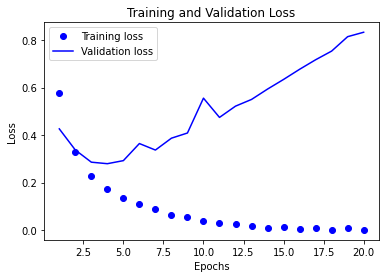

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, validation_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

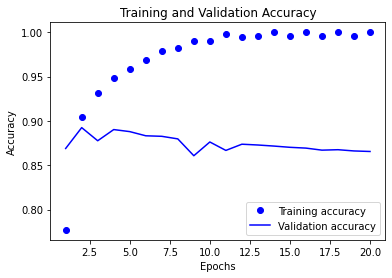

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
accuracy_values = history_dict['accuracy']
validation_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, 
    y_train, 
    epochs=4, 
    batch_size=512)

results = model.evaluate(x_test, y_test)
print(model.predict(x_test))

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.5454 - accuracy: 0.7356
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2023 - accuracy: 0.9294
Epoch 4/4
782/782 [==============================] - 1s 623us/step - loss: 0.3132 - accuracy: 0.8766
[[0.2589469 ]
 [0.9999492 ]
 [0.98974466]
 ...
 [0.1621336 ]
 [0.14407909]
 [0.81090415]]


In [13]:
# Decode a given review
def decode_review(index):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

    return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[index]])

decode_review(2)

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"